In [159]:
import pandas as pd
from preprocessing import load_data
import matplotlib.pyplot as plt
import dtale
from collections import defaultdict
import numpy as np
from tqdm import tqdm

In [18]:
data = load_data()
column_values = {'id':[],'cuisine':[],'ingredient':[]}
for dp in data:
    for ingredient in dp['ingredients']:
        column_values['id'].append(dp['id'])
        column_values['cuisine'].append(dp['cuisine'])
        column_values['ingredient'].append(ingredient)
df = pd.DataFrame(column_values)
df.head()

,id,cuisine,ingredient
0,10259,greek,romaine lettuce
1,10259,greek,black olives
2,10259,greek,grape tomatoes
3,10259,greek,garlic
4,10259,greek,pepper


In [85]:
num_ingredients = df[['ingredient','id']].drop_duplicates()\
                    .groupby('id').count()\
                    .sort_values('ingredient',ascending=False)

df

,id,cuisine,ingredient
0,10259,greek,romaine lettuce
1,10259,greek,black olives
2,10259,greek,grape tomatoes
3,10259,greek,garlic
4,10259,greek,pepper
...,...,...,...
428270,2362,mexican,garlic
428271,2362,mexican,white sugar
428272,2362,mexican,roma tomatoes
428273,2362,mexican,celery


<AxesSubplot: title={'center': 'Number of recipes pr. cuisine'}, xlabel='cuisine'>

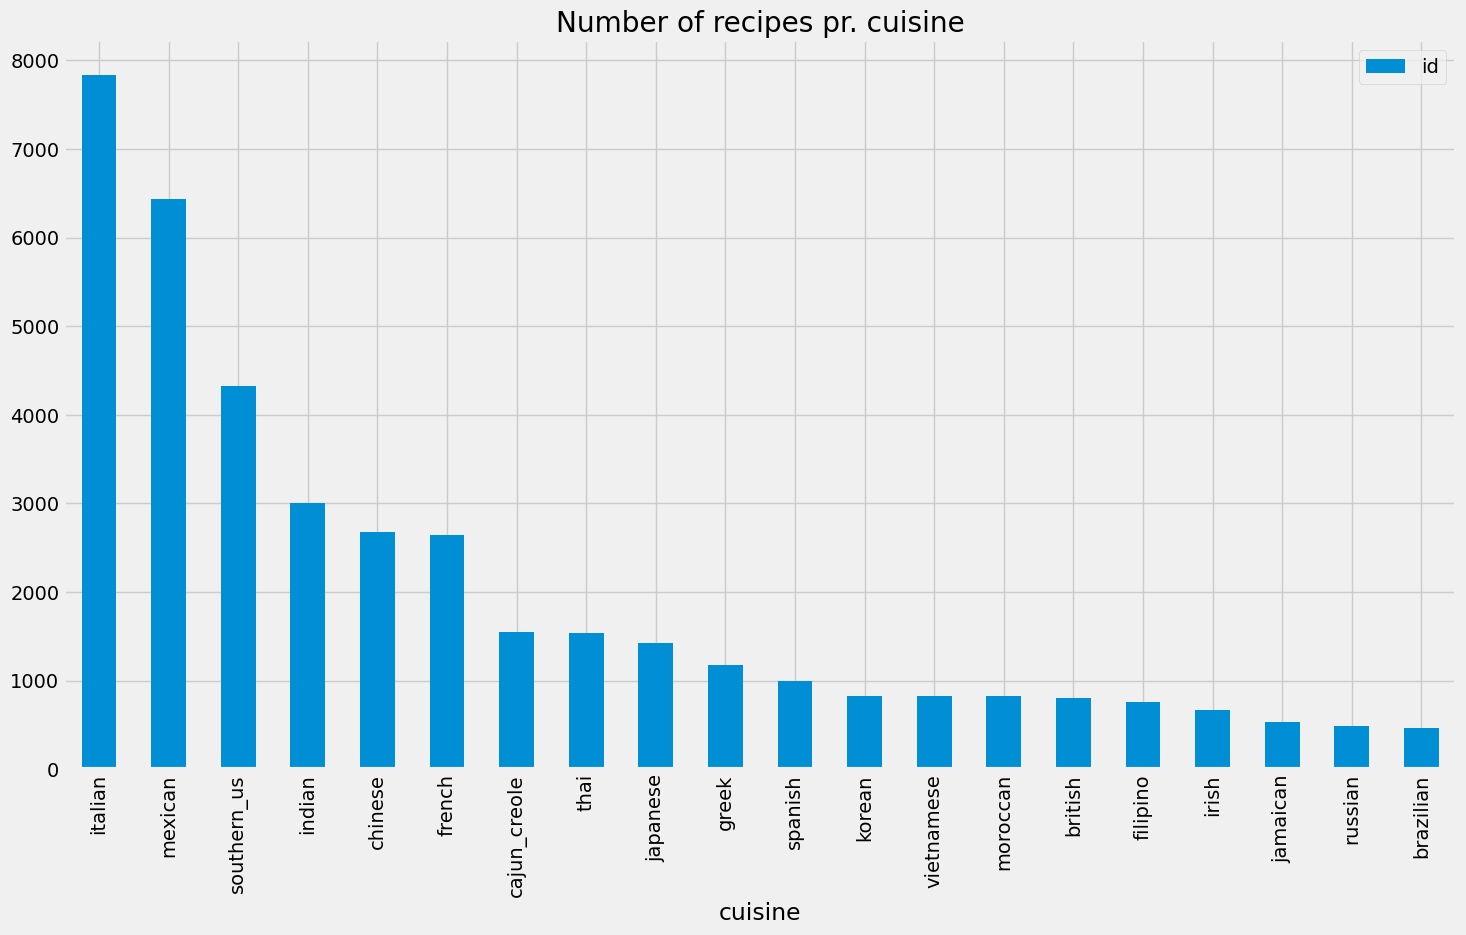

In [91]:
num_dishes = df[['cuisine','id']].drop_duplicates()\
                    .groupby('cuisine').count()\
                    .sort_values('id',ascending=False)
num_dishes.plot(kind='bar',figsize=[16,9],title='Number of recipes pr. cuisine')

In [98]:
df

,id,cuisine,ingredient
0,10259,greek,romaine lettuce
1,10259,greek,black olives
2,10259,greek,grape tomatoes
3,10259,greek,garlic
4,10259,greek,pepper


<AxesSubplot: title={'center': 'Number of ingredients pr. cuisine'}, xlabel='cuisine'>

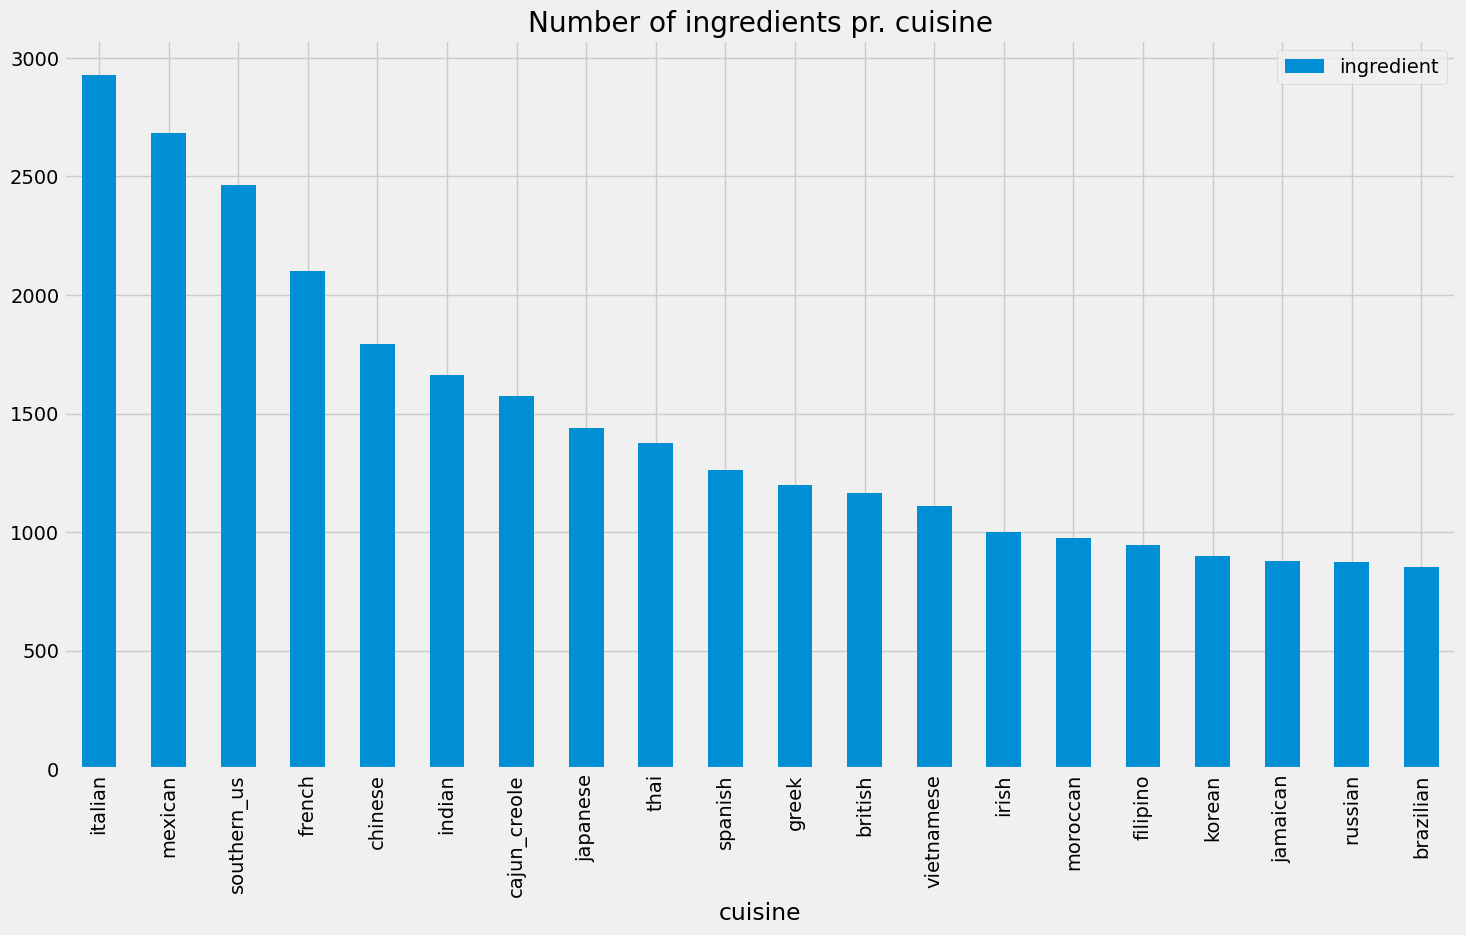

In [92]:
num_ing_cuisine = df[['cuisine','ingredient']].drop_duplicates()\
                    .groupby('cuisine').count()\
                    .sort_values('ingredient',ascending=False)
num_ing_cuisine.plot(kind='bar',figsize=[16,9],title='Number of ingredients pr. cuisine')

<AxesSubplot: title={'center': 'Number of ingredients pr. cuisine'}, xlabel='cuisine'>

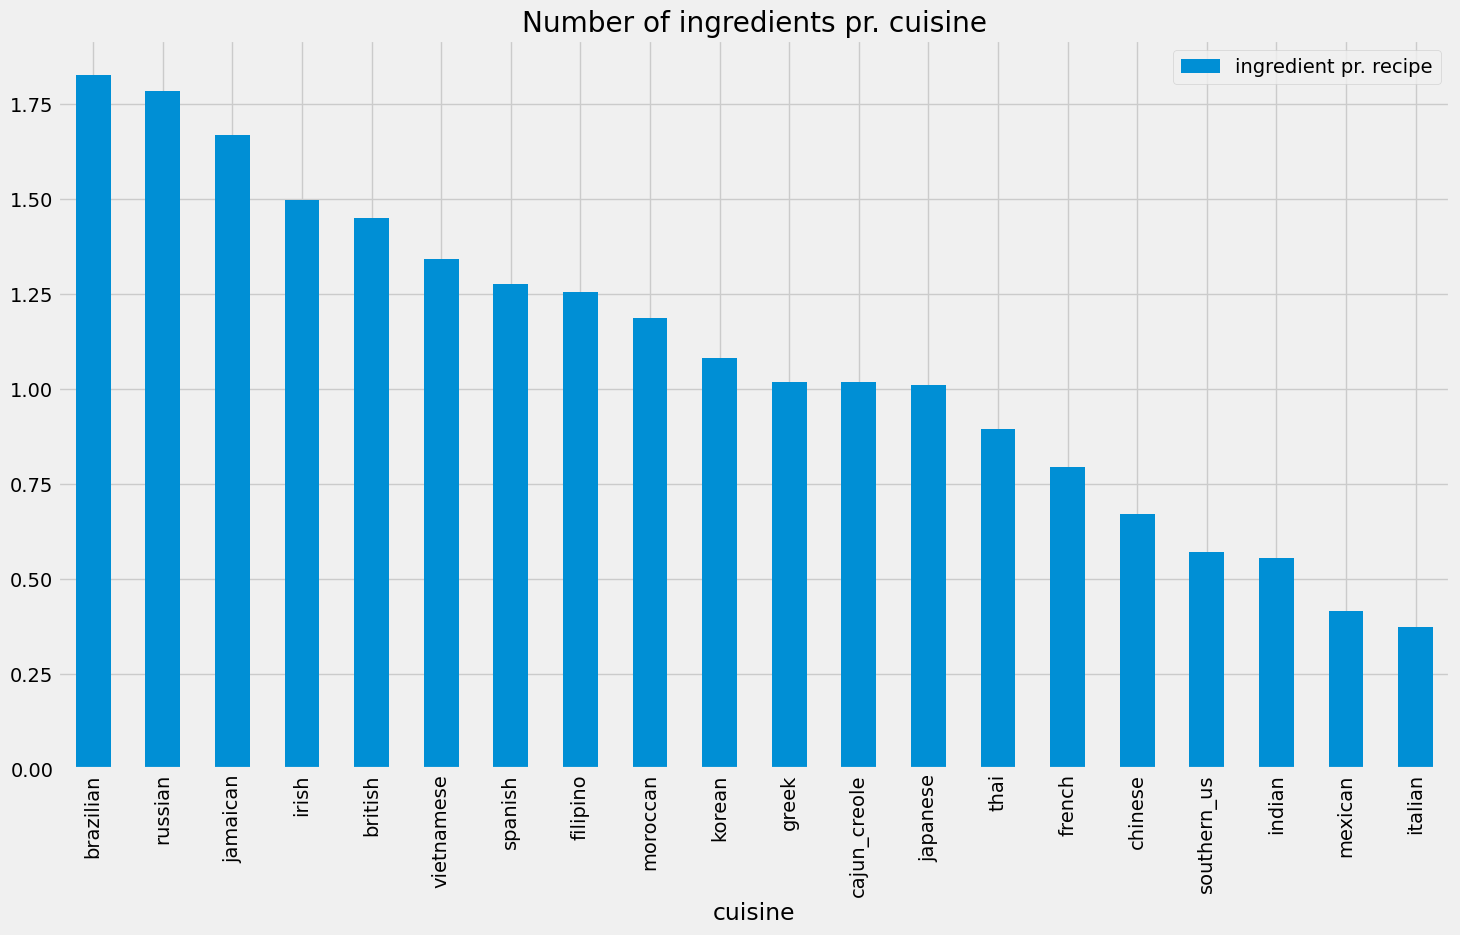

In [97]:
count_frame = num_dishes.merge(num_ing_cuisine,on='cuisine')
count_frame['ingredient pr. recipe'] = [row['ingredient']/row['id'] for k, row in count_frame.iterrows()]
count_frame.sort_values('ingredient pr. recipe',ascending=False)\
           .plot(kind='bar',
                 y='ingredient pr. recipe',
                 figsize=[16,9],
                 title='Number of ingredients pr. cuisine')

<AxesSubplot: title={'center': 'Number of ingredients being used in a number of dishes'}, ylabel='Frequency'>

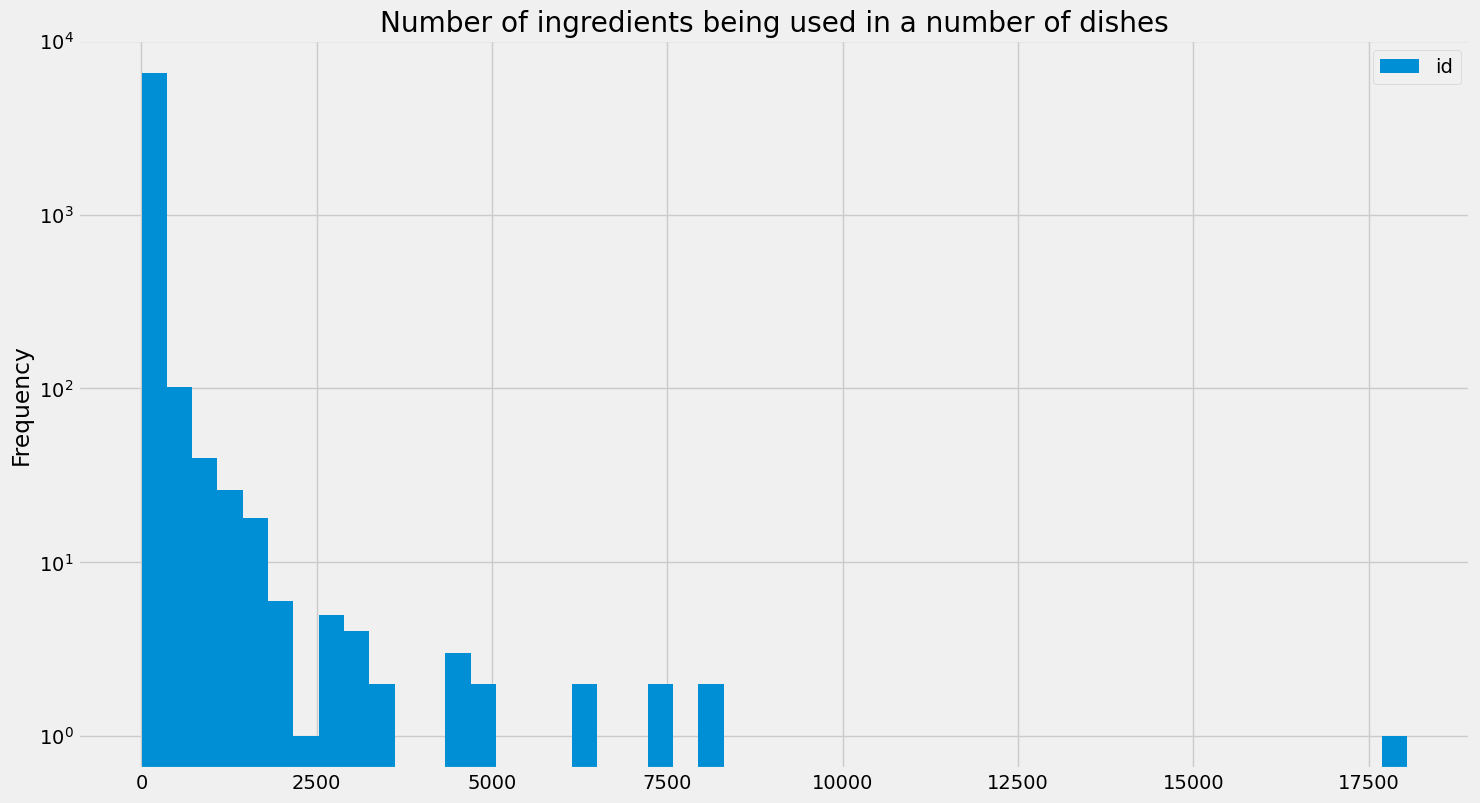

In [67]:
plt.style.use('fivethirtyeight')
recipes = df[['id','ingredient']].drop_duplicates()\
                            .groupby('ingredient')\
                            .aggregate('count')\
                            .sort_values(by='id',
                                         ascending=False)



recipes.plot(kind='hist',
                   figsize=[16,9],
                   title='Number of ingredients being used in a number of dishes',
                   bins=50, 
                   log=True)


In [69]:
recipes.head(40)

,id
ingredient,
salt,18048
onions,7972
olive oil,7971
water,7457
garlic,7380
sugar,6434
garlic cloves,6236
butter,4847
ground black pepper,4784


<AxesSubplot: title={'center': 'Number of ingredients being used in a number of cuisines'}, ylabel='cuisine'>

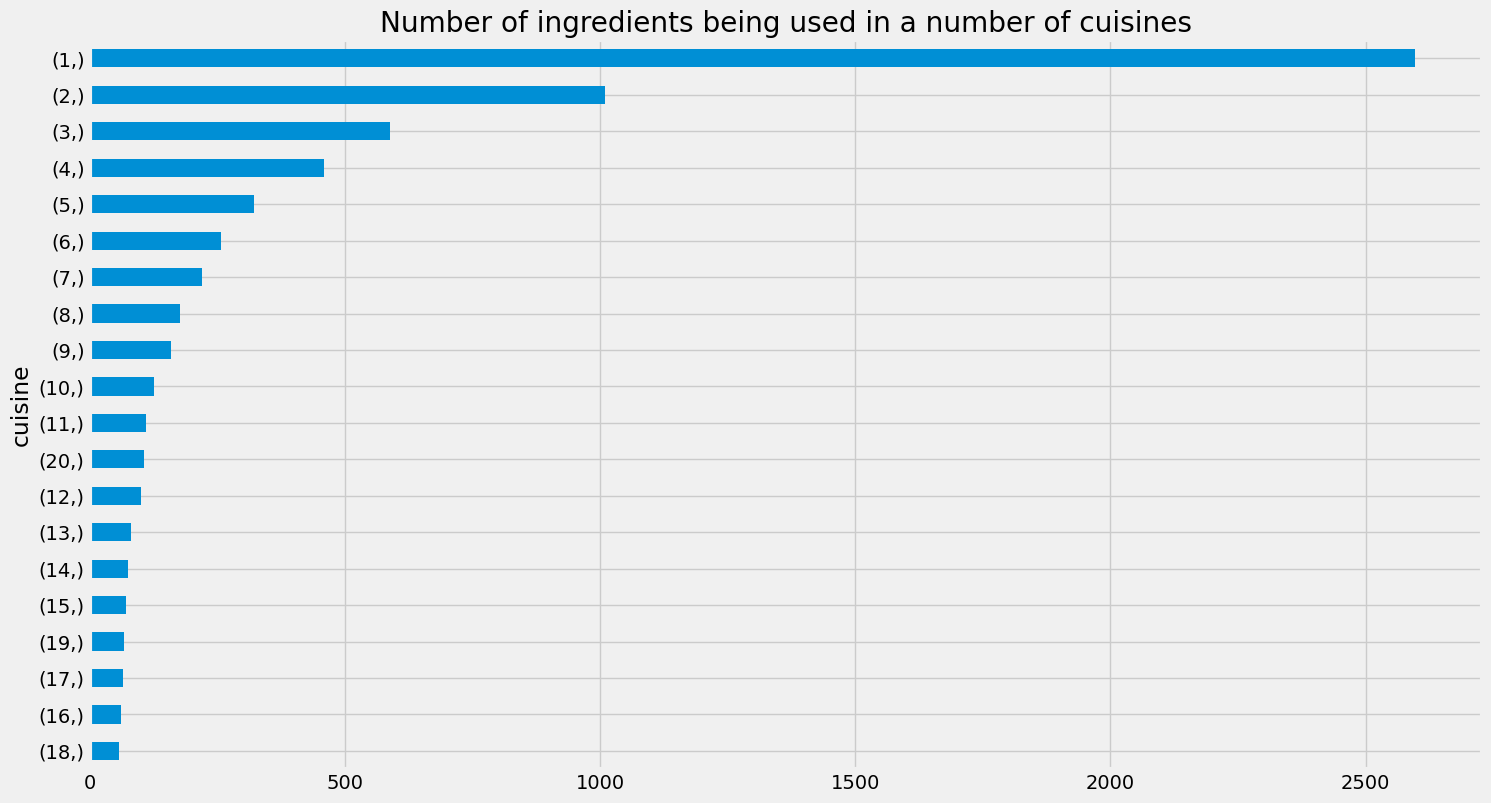

In [43]:
plt.style.use('fivethirtyeight')
cuisines = df[['cuisine','ingredient']].drop_duplicates()\
                            .groupby('ingredient')\
                            .aggregate('count')\
                            .sort_values(by='cuisine',
                                         ascending=False)\


cuisine_counts = cuisines.value_counts().sort_values()

cuisine_counts.plot(kind='barh',
                   figsize=[16,9],
                   title='Number of ingredients being used in a number of cuisines')


In [109]:
merge_cusines = cuisines.reset_index()
merge_cusines['used_in_num_cuisines'] = merge_cusines['cuisine']
merge_cusines.drop('cuisine',axis=1,inplace=True)
ingredient_usage = df.merge(merge_cusines,on='ingredient')
ingredient_usage

,id,cuisine,ingredient,used_in_num_cuisines
0,10259,greek,romaine lettuce,13
1,242,korean,romaine lettuce,13
2,31428,mexican,romaine lettuce,13
3,45990,thai,romaine lettuce,13
4,39904,greek,romaine lettuce,13
...,...,...,...,...
428270,36135,southern_us,Lipton® Iced Tea Brew Family Size Tea Bags,1
428271,40586,greek,Hidden Valley® Greek Yogurt Original Ranch® Di...,1
428272,38509,chinese,lop chong,1
428273,10115,italian,tomato garlic pasta sauce,1


In [114]:
ingredient_usage[['cuisine','used_in_num_cuisines']].groupby('cuisine').median().sort_values('used_in_num_cuisines')

,used_in_num_cuisines
cuisine,
thai,17.0
vietnamese,18.0
japanese,18.0
moroccan,19.0
mexican,19.0
korean,19.0
indian,19.0
brazilian,19.0
french,19.0


In [132]:
cuisine_identifiers = ingredient_usage[['cuisine','ingredient','used_in_num_cuisines']].drop_duplicates().loc[ingredient_usage['used_in_num_cuisines']==1]
num_cuisine = cuisine_identifiers[['cuisine','used_in_num_cuisines']]\
                    .groupby('cuisine')\
                    .sum()\
                    .sort_values('used_in_num_cuisines',ascending=False)
num_cuisine

,used_in_num_cuisines
cuisine,
italian,480
mexican,456
southern_us,272
chinese,197
french,193
indian,143
japanese,139
cajun_creole,105
british,76


In [138]:
num_cuisine_identifiers = num_dishes.merge(num_cuisine,on='cuisine')
num_cuisine_identifiers['num_dishes'] = num_cuisine_identifiers['id']
num_cuisine_identifiers.drop('id',axis=1,inplace=True)
num_cuisine_identifiers['num_identifier_pr_recipe'] = [row['used_in_num_cuisines']/row['num_dishes'] for k,row in num_cuisine_identifiers.iterrows()]
num_cuisine_identifiers.sort_values('num_identifier_pr_recipe')

,used_in_num_cuisines,num_dishes,num_identifier_pr_recipe
cuisine,,,
moroccan,34,821,0.041413
indian,143,3003,0.047619
thai,74,1539,0.048083
korean,41,830,0.049398
irish,36,667,0.053973
spanish,54,989,0.054601
greek,65,1175,0.055319
vietnamese,46,825,0.055758
italian,480,7838,0.061240


In [141]:
unique_cuisines = df.cuisine.unique().tolist()
unique_cuisines

['greek',
 'southern_us',
 'filipino',
 'indian',
 'jamaican',
 'spanish',
 'italian',
 'mexican',
 'chinese',
 'british',
 'thai',
 'vietnamese',
 'cajun_creole',
 'brazilian',
 'french',
 'japanese',
 'irish',
 'korean',
 'moroccan',
 'russian']

In [150]:
def jaccard(cuisine_a,cuisine_b):
    c_a = df.loc[df['cuisine']==cuisine_a]['ingredient'].unique().tolist()
    c_b = df.loc[df['cuisine']==cuisine_b]['ingredient'].unique().tolist()
    return len(np.intersect1d(c_a,c_b))/len(np.union1d(c_a,c_b))

In [160]:
conf_matrix_dict = defaultdict(list)
for c1 in tqdm(unique_cuisines):
    for c2 in unique_cuisines:
        if c1==c2:
            conf_matrix_dict[c2].append(None)
            continue
        conf_matrix_dict[c2].append(jaccard(c1,c2))
    conf_matrix_dict['cuisine'].append(c1)
jaccard_df = pd.DataFrame(conf_matrix_dict).set_index('cuisine')
jaccard_df

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:21<00:00,  1.09s/it]


,greek,southern_us,filipino,indian,jamaican,spanish,italian,mexican,chinese,british,thai,vietnamese,cajun_creole,brazilian,french,japanese,irish,korean,moroccan,russian
cuisine,,,,,,,,,,,,,,,,,,,,
greek,NaN,0.296034,0.241319,0.334266,0.281655,0.372560,0.316008,0.294431,0.264805,0.282691,0.287000,0.247161,0.334295,0.267614,0.343101,0.261119,0.290076,0.236578,0.397683,0.306818
southern_us,0.296034,NaN,0.232020,0.321589,0.257627,0.324209,0.403906,0.420762,0.305709,0.291563,0.270020,0.227226,0.394337,0.240180,0.394013,0.262051,0.284707,0.198716,0.257226,0.238945
filipino,0.241319,0.232020,NaN,0.279275,0.316017,0.265750,0.196296,0.223383,0.314299,0.234229,0.331232,0.349311,0.267202,0.298701,0.225482,0.310269,0.226986,0.313167,0.260499,0.254483
indian,0.334266,0.321589,0.279275,NaN,0.308445,0.319063,0.298925,0.320377,0.341094,0.281123,0.382447,0.306315,0.302774,0.269289,0.311738,0.352659,0.269304,0.246109,0.361197,0.271178
jamaican,0.281655,0.257627,0.316017,0.308445,NaN,0.320173,0.210560,0.247722,0.267331,0.276875,0.291117,0.275707,0.308267,0.341085,0.244361,0.273927,0.284932,0.258865,0.306281,0.281319
spanish,0.372560,0.324209,0.265750,0.319063,0.320173,NaN,0.329949,0.318744,0.275042,0.307320,0.286689,0.257825,0.362938,0.318380,0.385914,0.269140,0.308271,0.241954,0.367359,0.310620
italian,0.316008,0.403906,0.196296,0.298925,0.210560,0.329949,NaN,0.408886,0.283927,0.260388,0.256201,0.211221,0.354887,0.207535,0.440309,0.249071,0.244613,0.180444,0.252567,0.222580
mexican,0.294431,0.420762,0.223383,0.320377,0.247722,0.318744,0.408886,NaN,0.310688,0.241535,0.290528,0.242464,0.357553,0.231117,0.350833,0.260471,0.240067,0.200000,0.254028,0.226630
chinese,0.264805,0.305709,0.314299,0.341094,0.267331,0.275042,0.283927,0.310688,NaN,0.249155,0.427670,0.390887,0.297381,0.247053,0.291971,0.387887,0.230600,0.331024,0.277008,0.235622


In [163]:
df[['id','ingredients']]

,id,cuisine,ingredient
0,10259,greek,romaine lettuce
1,10259,greek,black olives
2,10259,greek,grape tomatoes
3,10259,greek,garlic
4,10259,greek,pepper
...,...,...,...
428270,2362,mexican,garlic
428271,2362,mexican,white sugar
428272,2362,mexican,roma tomatoes
428273,2362,mexican,celery


<AxesSubplot: ylabel='cuisine'>

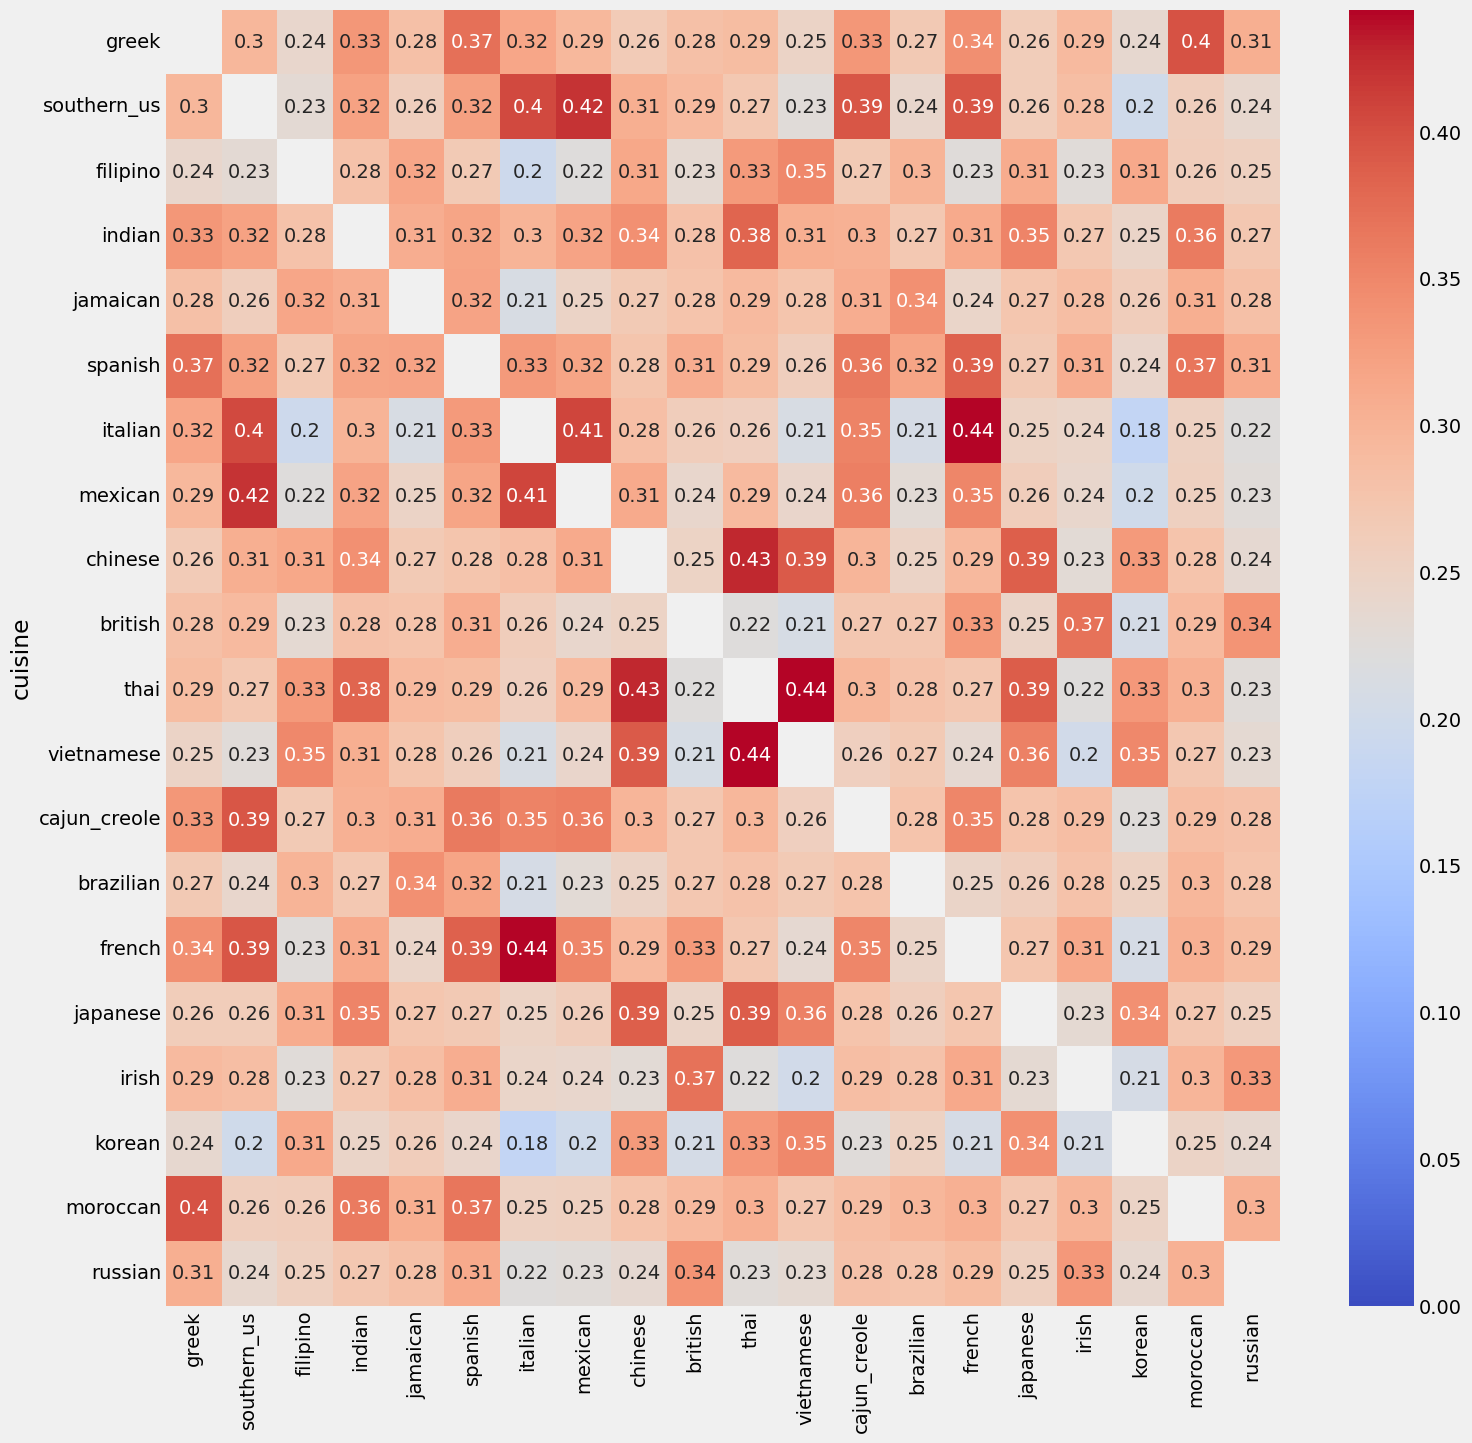

In [169]:
import seaborn as sns

plt.figure(figsize=(16,16))
sns.heatmap(jaccard_df,
            vmin=0,
            cmap='coolwarm',
            annot=True)

In [162]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')
model.fit(df)
labels = model.labels_

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [161]:
dtale.show(jaccard_df)

In [153]:
for k,v in conf_matrix_dict.items():
    print(k,len(v))

cuisine 400
greek 20
southern_us 20
filipino 20
indian 20
jamaican 20
spanish 20
italian 20
mexican 20
chinese 20
british 20
thai 20
vietnamese 20
cajun_creole 20
brazilian 20
french 20
japanese 20
irish 20
korean 20
moroccan 20
russian 20


0.4403091898081878

In [62]:
ketchup_ids = df.loc[df.ingredient=='ketchup'].drop_duplicates(['cuisine'])['id'].values.tolist()
ketchup_recipes = df.loc[df['id'].isin(ketchup_ids)]
for c in df.cuisine.unique():
    print('===========',c,'===========')
    for k,row in ketchup_recipes.loc[ketchup_recipes['cuisine']==c].iterrows():
        print(row['ingredient'])
    print('\n\n')

=========== greek ===========
eggs
kosher salt
parsley
purple onion
ground beef
ketchup
feta cheese
red wine vinegar
smoked paprika
oregano
brown sugar
whole grain mustard
cinnamon
dry bread crumbs
glaze
black pepper
cayenne
garlic
fresh mint



=========== southern_us ===========
ketchup
honey
Tabasco Pepper Sauce
freshly ground pepper
onions
kosher salt
unsalted butter
heavy cream
thyme
extra sharp cheddar cheese
molasses
ground black pepper
vegetable oil
garlic cloves
grits
chicken broth
cider vinegar
bourbon whiskey
cayenne pepper
chopped parsley
large shrimp



=========== filipino ===========
ginger ale
ground black pepper
freshly ground pepper
soy sauce
garlic
bamboo shoots
white vinegar
ketchup
salt
mango
brown sugar
crushed garlic
pork shoulder



=========== indian ===========
ketchup
milk
butter
sour cream
ground turmeric
tomatoes
pepper
garam masala
salt
onions
ground ginger
chicken bouillon
garbanzo beans
garlic
coconut milk
ground paprika
curry powder
potatoes
ground almo

In [60]:
ketchup_recipes.loc[ketchup_recipes['cuisine']==c]

,id,cuisine,ingredient
340568,11139,greek,eggs
340569,11139,greek,kosher salt
340570,11139,greek,parsley
340571,11139,greek,purple onion
340572,11139,greek,ground beef
340573,11139,greek,ketchup
340574,11139,greek,feta cheese
340575,11139,greek,red wine vinegar
340576,11139,greek,smoked paprika
340577,11139,greek,oregano
